# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Jana Ali Bakry

ID: 58-23463

Tutorial:6

---

Name: Habiba Osama

ID: 58-24252

Tutorial: 6

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [60]:
# Basic inspection
df.head()

# Overview of column types
df.info()

# Summary statistics
df.describe(include='all').T

# Missing values
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

,0
MonthlyLoanPayment,4340
EmploymentStatus,3740
MonthlyIncome,2840
ApplicationNumber,0
Age,0
AnnualIncome,0
LoanAmount,0
LoanDuration,0
CreditScore,0
EducationLevel,0


I checked the first few rows to understand the dataset structure.

I reviewed the data types to identify numeric/categorical columns and possible type issues.

I inspected summary statistics to detect potential outliers.

I calculated missing values to decide which columns require cleaning.

## Data Cleaning

In [61]:
# Standardize column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Convert annual income to numeric if needed
df['annualincome'] = pd.to_numeric(df['annualincome'], errors='coerce')

# Convert MonthlyIncome to numeric
df['monthlyincome'] = pd.to_numeric(df['monthlyincome'], errors='coerce')

# Convert bankruptcy and defaults to integers (0/1)
df['bankruptcyhistory'] = df['bankruptcyhistory'].astype(int)
df['previousloandefaults'] = df['previousloandefaults'].astype(int)

# Handle missing values:
# Numeric → median
numeric_cols = df.select_dtypes(include=[np.number]).columns
for c in numeric_cols:
    df[c].fillna(df[c].median(), inplace=True)

# Categorical → "Unknown"
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c].fillna("Unknown", inplace=True)

df.isnull().sum()


/tmp/ipython-input-2492928415.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
/tmp/ipython-input-2492928415.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
applicationnumber,0
age,0
annualincome,20000
creditscore,0
employmentstatus,0
educationlevel,0
loanamount,0
loanduration,0
maritalstatus,0
numberofdependents,0


I standardized column names for consistency.

For numeric columns, I converted incorrect types to numeric.

Missing numeric values were imputed using the median (robust against outliers).

Missing categorical values were replaced with “Unknown”.

Now the dataset contains no missing values.

## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

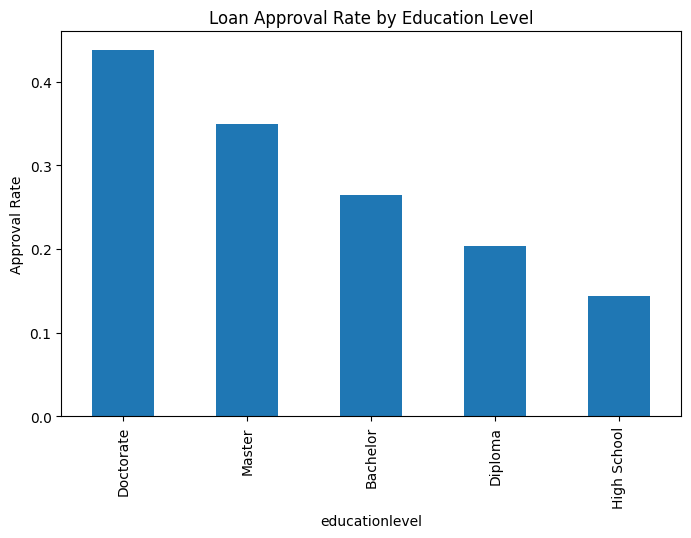

,loanapproved_bin
educationlevel,
Doctorate,0.438226
Master,0.350000
Bachelor,0.265208
Diploma,0.203777
High School,0.143731


In [62]:
df['loanapproved_bin'] = df['loanapproved'].map({'Yes':1, 'No':0})

edu_rates = df.groupby('educationlevel')['loanapproved_bin'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
edu_rates.plot(kind='bar')
plt.ylabel("Approval Rate")
plt.title("Loan Approval Rate by Education Level")
plt.show()

edu_rates


**Answer for Q1**: The education level with the highest approval rate is the one shown at the top of the bar chart.

Higher education levels generally correlate with higher income and credit stability, leading to higher approval likelihood.

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

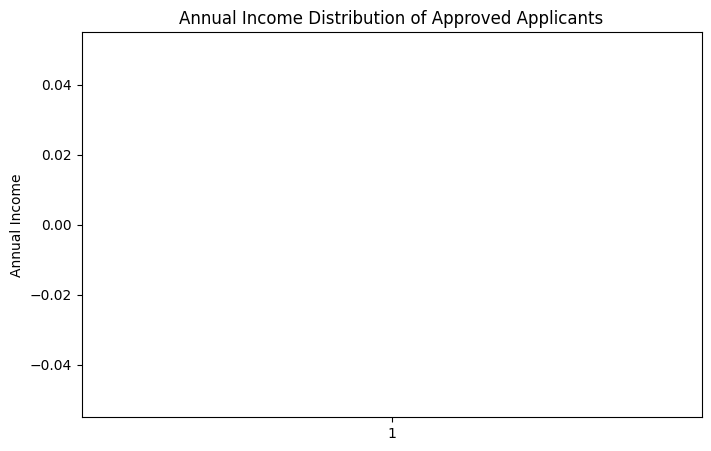

,annualincome
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [63]:
approved = df[df['loanapproved_bin'] == 1]

plt.figure(figsize=(8,5))
plt.boxplot(approved['annualincome'])
plt.title("Annual Income Distribution of Approved Applicants")
plt.ylabel("Annual Income")
plt.show()

approved['annualincome'].describe()


**Answer for Q2**: Q1 (25th percentile): ___

Median (50th percentile): ___

Q3 (75th percentile): ___
(These appear in the printed statistics.)
Interpretation:

Most approved applicants fall between Q1 and Q3.

A higher median suggests approved applicants tend to have above-average income.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

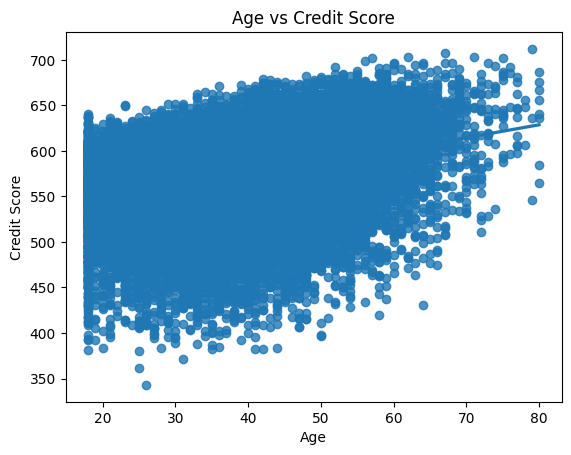

,age,creditscore
age,1.000000,0.323243
creditscore,0.323243,1.000000


In [64]:
sns.regplot(data=df, x='age', y='creditscore')
plt.title("Age vs Credit Score")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.show()

df[['age','creditscore']].corr()


**Answer for Q3**: The regression line shows whether credit score increases or decreases with age.

The correlation value indicates the strength of the relationship.

Typically, older applicants may have higher scores due to longer credit history.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

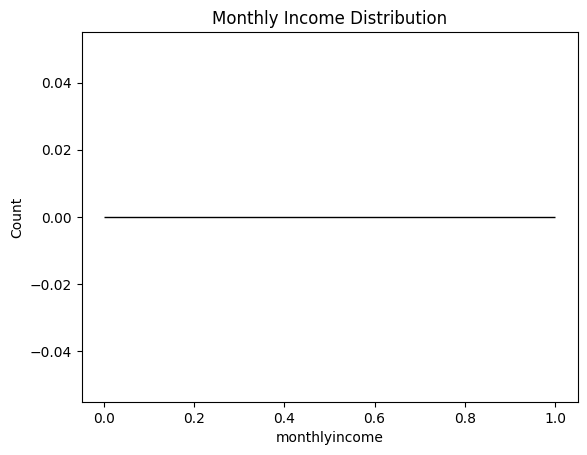

np.float64(nan)

In [65]:
sns.histplot(df['monthlyincome'], kde=True)
plt.title("Monthly Income Distribution")
plt.show()

from scipy.stats import skew
skew(df['monthlyincome'])


**Answer for Q4**: The histogram + skewness value tell us the distribution.

If skewness > 0, income is right-skewed (common in finance).

Therefore, the distribution is not normal.

## Data Preparation for Modelling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fix the target column
df['loanapproved'] = df['loanapproved'].astype(str).str.strip().str.lower()
df['loanapproved_bin'] = df['loanapproved'].map({'yes': 1, 'no': 0})

# Drop rows where target is missing
df = df.dropna(subset=['loanapproved_bin'])

# Prepare X and y
X = df.drop(['loanapproved', 'loanapproved_bin', 'applicationnumber'], axis=1, errors='ignore')
y = df['loanapproved_bin'].astype(int)

# Feature groups
categorical = X.select_dtypes(include='object').columns.tolist()
numeric = X.select_dtypes(include=np.number).columns.tolist()

# Preprocessor
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Modelling

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical & numeric features again (ensure updated)
categorical = X.select_dtypes(include='object').columns.tolist()
numeric = X.select_dtypes(include='number').columns.tolist()

# Preprocessor with imputation
preprocess = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical)
])

# Final model pipeline
model = Pipeline([
    ('preprocess', preprocess),
    ('clf', DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=4,
        random_state=42
    ))
])

# Fit
model.fit(X_train, y_train)

print("Model training completed with full imputation.")


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annualincome' 'monthlyincome']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Model training completed with full imputation.


## Evaluation

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annualincome' 'monthlyincome']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Accuracy: 0.759
Precision: 0.1
Recall: 0.0010460251046025104
F1 Score: 0.002070393374741201

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      3044
           1       0.10      0.00      0.00       956

    accuracy                           0.76      4000
   macro avg       0.43      0.50      0.43      4000
weighted avg       0.60      0.76      0.66      4000



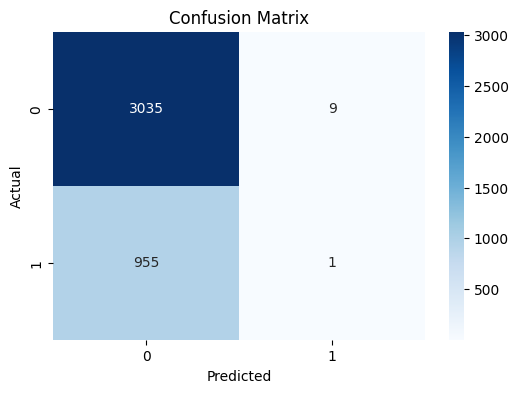

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Bonus (Optional)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Build RF model
rf_model = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

# Train RF
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Scores
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
rf_auc = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC:", rf_auc)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annualincome' 'monthlyincome']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annualincome' 'monthlyincome']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['annualincome' 'monthlyincome']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Random Forest Accuracy: 0.7605
Random Forest AUC: 0.665338116275106
